In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


cleaned_data = pd.read_csv('CleanedRideshareTaxi.csv')

In [2]:
print(cleaned_data.describe())
cleaned_data[285:298]

       MonthlyTaxiTrips  Completed.Trip
count       5266.000000    28592.000000
mean         111.407330        0.991186
std          118.658593        0.093468
min            1.000000        0.000000
25%           38.000000        1.000000
50%           79.000000        1.000000
75%          138.000000        1.000000
max          520.000000        1.000000


,TripID,Exit.DateTime,Company.Anon,Entry.DateTime,Wait.Time,Time.Since.Prev,MonthlyTaxiTrips,Completed.Trip
285,d49867b3-e0b9-4f7c-b8dc-ca560355dc2e,2023-02-15 10:43:55,Rideshare,2023-02-15 10:36:19,00:07:35,NaN,NaN,1.0
286,aa34430d-bd2c-4998-9423-18a2b11b882d,2023-02-15 10:44:35,Rideshare,2023-02-15 10:36:59,00:07:35,NaN,NaN,1.0
287,3a03354c-d133-40c4-a3ca-f67d9c564463,2023-02-15 10:44:43,Rideshare,2023-02-15 10:37:07,00:07:35,NaN,NaN,1.0
288,2079683,2023-02-15 10:45:00,TC19,2023-02-15 10:41:36,00:03:24,242.12,99.0,1.0
289,2575057,2023-02-15 10:46:00,TC4,2023-02-15 10:42:31,00:03:28,106.17,76.0,1.0
290,09dfca93-f769-43e3-8776-3305e1e890be,2023-02-15 10:46:48,Rideshare,2023-02-15 10:39:12,00:07:35,NaN,NaN,1.0
291,e0983aa9-cb32-40df-aaa9-797308889860,2023-02-15 10:47:26,Rideshare,2023-02-15 10:39:50,00:07:35,NaN,NaN,1.0
292,b7cdb320-9a7e-44cb-a045-966603c71568,2023-02-15 10:47:31,Rideshare,2023-02-15 10:39:55,00:07:35,NaN,NaN,1.0
293,b856fd47-4d4b-44da-8f72-d5d3b39e51ba,2023-02-15 10:47:49,Rideshare,2023-02-15 10:40:13,00:07:35,NaN,NaN,1.0
294,1066486,2023-02-15 10:48:00,TC20,2023-02-15 10:42:04,00:05:55,914.23,88.0,1.0


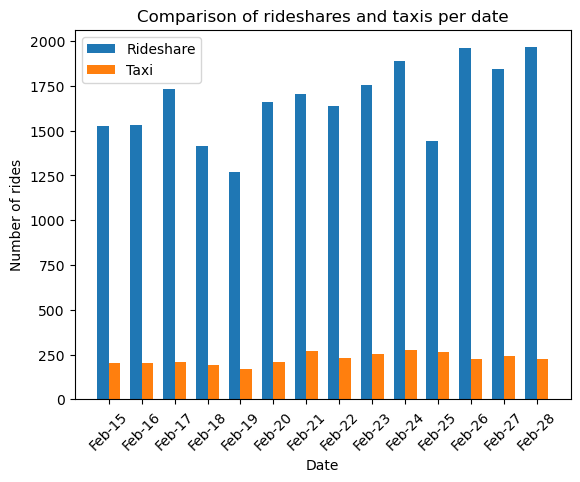

In [3]:
# Convert the Exit.DateTime column into a date format
cleaned_data['date'] = pd.to_datetime(cleaned_data['Exit.DateTime']).dt.strftime('%b-%d')

# Create a new column that indicates the type of ride
cleaned_data['ride_type'] = cleaned_data['Company.Anon'].apply(lambda x: 'Rideshare' if x == 'Rideshare' else 'taxi')

# Group the data by date and ride type and count the number of rides for each group
grouped = cleaned_data.groupby(['date', 'ride_type'])['TripID'].count().reset_index()

# Separate the data for rideshares and taxis
rideshare_data = grouped[grouped['ride_type'] == 'Rideshare']
taxi_data = grouped[(grouped['ride_type'] == 'taxi') & (grouped['date'] >= 'Feb-15') & (grouped['date'] <= 'Feb-28')]

# Set the width of the bars
bar_width = 0.35

# Set the x-axis position of the bars
rideshare_x = np.arange(len(rideshare_data))
taxi_x = np.arange(len(taxi_data)) + bar_width

# Create a clustered column chart that shows the number of rideshares and taxis for each date
plt.bar(rideshare_x, rideshare_data['TripID'], width=bar_width, label='Rideshare')
plt.bar(taxi_x, taxi_data['TripID'], width=bar_width, label='Taxi')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Number of rides')
plt.title('Comparison of rideshares and taxis per date')
plt.xticks(rideshare_x + bar_width/2, rideshare_data['date'], rotation=45)
plt.show()

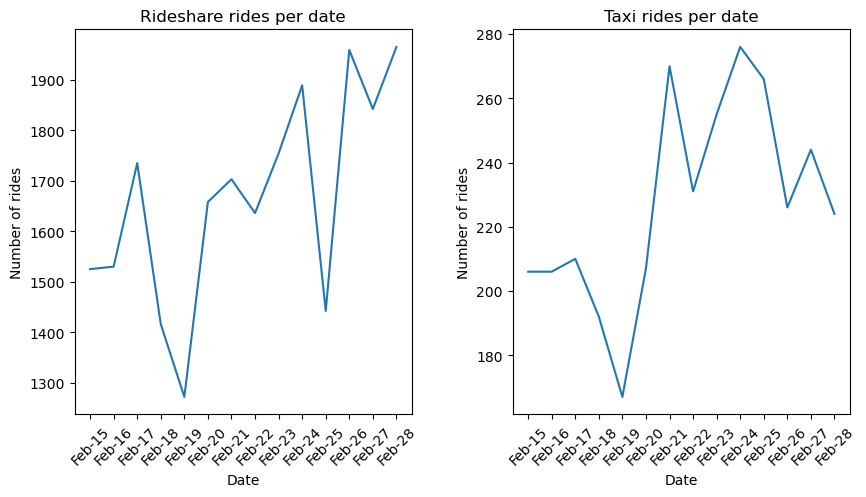

In [4]:

# Convert the Exit.DateTime column into a date format
cleaned_data['date'] = pd.to_datetime(cleaned_data['Exit.DateTime']).dt.strftime('%b-%d')

# Create a new column that indicates the type of ride
cleaned_data['ride_type'] = cleaned_data['Company.Anon'].apply(lambda x: 'Rideshare' if x == 'Rideshare' else 'taxi')

# Group the data by date and ride type and count the number of rides for each group
grouped = cleaned_data.groupby(['date', 'ride_type'])['TripID'].count().reset_index()

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,5))

# Create the first subplot for rideshares
rideshare_data = grouped[grouped['ride_type'] == 'Rideshare']
ax1.plot(rideshare_data['date'], rideshare_data['TripID'])
ax1.set_xlabel('Date')
ax1.set_ylabel('Number of rides')
ax1.set_title('Rideshare rides per date')

# Create the second subplot for taxis
taxi_data = grouped[grouped['ride_type'] == 'taxi']
taxi_data = taxi_data[(taxi_data['date'] >= 'Feb-15') & (taxi_data['date'] <= 'Feb-28')]  # filter the data
ax2.plot(taxi_data['date'], taxi_data['TripID'])
ax2.set_xlabel('Date')
ax2.set_ylabel('Number of rides')
ax2.set_title('Taxi rides per date')

# Set the rotation of the x-axis labels
for ax in [ax1, ax2]:
    ax.tick_params(axis='x', rotation=45)

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.3)

# Display the plot
plt.show()

In [5]:
#investigating nulls

#Counting the number of missing values in each column
null_counts = cleaned_data.isnull().sum()

# Calculate the percentage of missing values in each column
null_percentages = null_counts / len(cleaned_data) * 100
print(null_percentages)


TripID               0.000000
Exit.DateTime        0.000000
Company.Anon         0.000000
Entry.DateTime       0.000000
Wait.Time            0.000000
Time.Since.Prev     81.582261
MonthlyTaxiTrips    81.582261
Completed.Trip       0.000000
date                 0.000000
ride_type            0.000000
dtype: float64


In [6]:
print(cleaned_data.isnull().sum())

TripID                  0
Exit.DateTime           0
Company.Anon            0
Entry.DateTime          0
Wait.Time               0
Time.Since.Prev     23326
MonthlyTaxiTrips    23326
Completed.Trip          0
date                    0
ride_type               0
dtype: int64


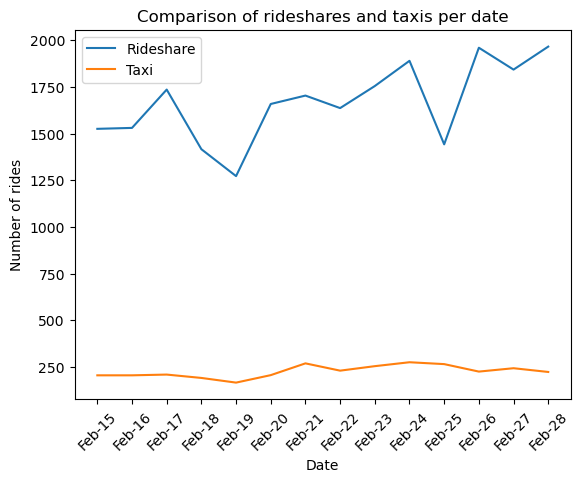

In [7]:
# Convert the Exit.DateTime column into a date format
cleaned_data['date'] = pd.to_datetime(cleaned_data['Exit.DateTime']).dt.strftime('%b-%d')

# Create a new column that indicates the type of ride
cleaned_data['ride_type'] = cleaned_data['Company.Anon'].apply(lambda x: 'Rideshare' if x == 'Rideshare' else 'taxi')

# Group the data by date and ride type and count the number of rides for each group
grouped = cleaned_data.groupby(['date', 'ride_type'])['TripID'].count().reset_index()

# Separate the data for rideshares and taxis
rideshare_data = grouped[grouped['ride_type'] == 'Rideshare']
taxi_data = grouped[(grouped['ride_type'] == 'taxi') & (grouped['date'] >= 'Feb-15') & (grouped['date'] <= 'Feb-28')]

# Set the x-axis position of the lines
rideshare_x = rideshare_data['date']
taxi_x = taxi_data['date']

# Create a line chart that shows the number of rideshares and taxis for each date
plt.plot(rideshare_x, rideshare_data['TripID'], label='Rideshare')
plt.plot(taxi_x, taxi_data['TripID'], label='Taxi')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Number of rides')
plt.title('Comparison of rideshares and taxis per date')
plt.xticks(rotation=45)
plt.show()


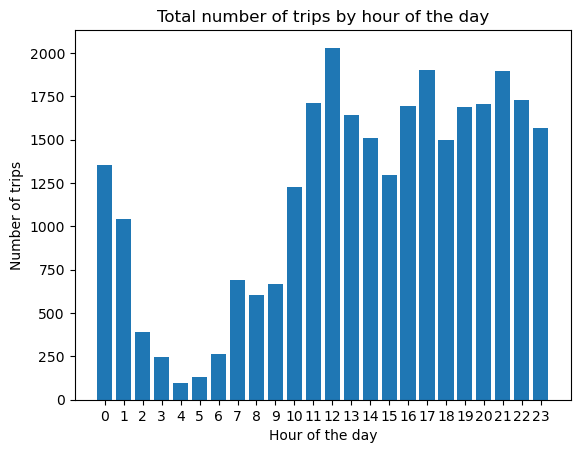

In [8]:
# Convert Exit.DateTime to a datetime object
cleaned_data['Exit.DateTime'] = pd.to_datetime(cleaned_data['Exit.DateTime'])

# Create a new column with the hour of the day
cleaned_data['Hour'] = cleaned_data['Exit.DateTime'].dt.hour

# Group data by Hour and count the number of TripIDs
grouped_data = cleaned_data.groupby('Hour')['TripID'].count()

# Create a bar chart of the data
plt.bar(grouped_data.index, grouped_data.values)
plt.title('Total number of trips by hour of the day')
plt.xlabel('Hour of the day')
plt.ylabel('Number of trips')
plt.xticks(range(24))
plt.show()

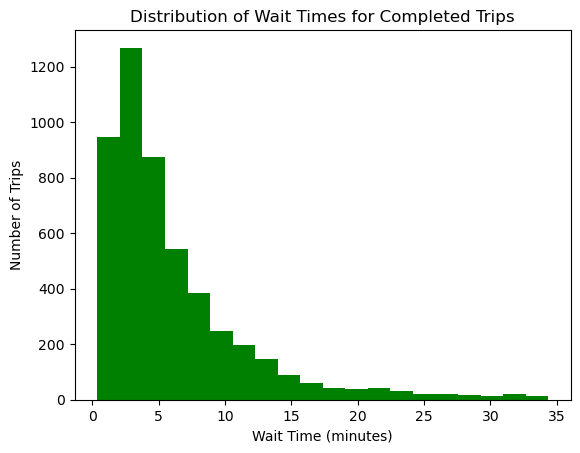

In [9]:
cleaned_data['Wait.Time'] = pd.to_timedelta(cleaned_data['Wait.Time'])
cleaned_data['Wait.Time'] = cleaned_data['Wait.Time'].dt.total_seconds() / 60
completed_trips = cleaned_data[cleaned_data['Completed.Trip'] == 1].dropna()

plt.hist(completed_trips['Wait.Time'], bins=20, color='green')
plt.title('Distribution of Wait Times for Completed Trips')
plt.xlabel('Wait Time (minutes)')
plt.ylabel('Number of Trips')
plt.show()


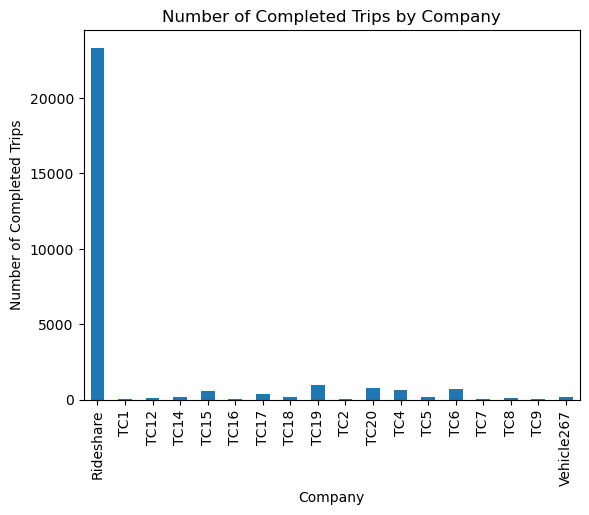

In [10]:
#visualizing through counting by Company.Anon andthe number of Completed.Trip for each

company_trips = cleaned_data.groupby('Company.Anon')['Completed.Trip'].sum()
company_trips.plot.bar()
plt.title('Number of Completed Trips by Company')
plt.xlabel('Company')
plt.ylabel('Number of Completed Trips')
plt.show()
